In [33]:
%matplotlib inline
import urllib.request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml
import requests
import pandas as pd
import time
import re
import random

In [62]:
WineName=[]
Grape=[]
Poplarity=[]
Score=[]
AvgPrice=[]
for i in range(1,9152, 25):
    url=''
    if i==1:
        url = 'http://www.wine-searcher.com/regions-bordeaux'
    else:
        url = 'http://www.wine-searcher.com/regions-bordeaux/{}'.format(i)
    proxies = {'http':'54.187.52.159:80'}
    r = requests.get(url, proxies=proxies)
    print(r.status_code, url)
    soup = BeautifulSoup(r.text, 'lxml')
    if not soup.find_all('tr')[1:]:
        print('no table in', url)
        continue
    for tr in soup.find_all('tr')[1:]:
        tds = tr.find_all('td')
        if tds[3].text.strip() and tds[4].text.strip():
            wineName=tds[0].text
            WineName.append(tds[0].text)
            Grape.append(tds[1].text)
            Poplarity.append(tds[2].text[1:-1])
            Score.append(int(re.findall('\d+', tds[3].text)[0]))
            AvgPrice.append(int(re.findall('\d+', tds[4].text.replace(',','').replace('.',''))[0]))
    time.sleep(random.randint(5,10))

200 http://www.wine-searcher.com/regions-bordeaux
200 http://www.wine-searcher.com/regions-bordeaux/26
200 http://www.wine-searcher.com/regions-bordeaux/51
200 http://www.wine-searcher.com/regions-bordeaux/76
200 http://www.wine-searcher.com/regions-bordeaux/101
200 http://www.wine-searcher.com/regions-bordeaux/126
200 http://www.wine-searcher.com/regions-bordeaux/151
200 http://www.wine-searcher.com/regions-bordeaux/176
200 http://www.wine-searcher.com/regions-bordeaux/201
200 http://www.wine-searcher.com/regions-bordeaux/226
200 http://www.wine-searcher.com/regions-bordeaux/251
200 http://www.wine-searcher.com/regions-bordeaux/276
200 http://www.wine-searcher.com/regions-bordeaux/301
200 http://www.wine-searcher.com/regions-bordeaux/326
200 http://www.wine-searcher.com/regions-bordeaux/351
200 http://www.wine-searcher.com/regions-bordeaux/376
200 http://www.wine-searcher.com/regions-bordeaux/401
200 http://www.wine-searcher.com/regions-bordeaux/426
200 http://www.wine-searcher.com/re

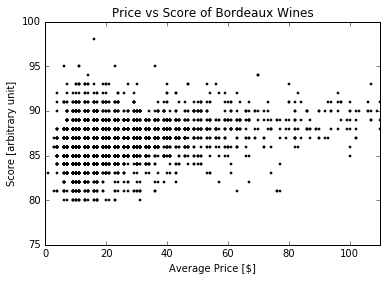

In [82]:
columns = {'WineName':WineName, 'Grape':Grape, 'Poplarity':Poplarity, 'Score':Score, 'AvgPrice':AvgPrice}
# columns = {'Score':Score[:500], 'AvgPrice':AvgPrice[:500]}
df = pd.DataFrame(columns)
# df
ax=df.plot(
#         x='AvgPrice['+u"\u00A5"+']',
    x='AvgPrice',
    y='Score', 
    kind='scatter', 
     xlim=[0,110],
    title='Price vs Score of Bordeaux Wines',
    s=3
)
ax.set_xlabel('Average Price [$]')
ax.set_ylabel('Score [arbitrary unit]')
ax.get_figure().savefig('BordeauxWines_score.png')
ax

In [70]:
import os
os.getcwd()

'/home/watanabe/vinplot'